<a href="https://colab.research.google.com/github/anaustinbeing/unsupervised-learning/blob/main/self_organizing_map_(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the necessary module for SOM. Minisom is mini version of som package and is light-weight.

In [ ]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=6d292fa13cf349bea5a28708ed163b0f18c8f3378039acd4f84d687c826fc75b
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


In [ ]:
from minisom import MiniSom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale

In [ ]:
digits = datasets.load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
data = digits.data
target = digits.target

### Scale the data

In [ ]:
data = scale(data)

In [ ]:
plt.imshow()

(1797, 64)

In [ ]:
target

array([0, 1, 2, ..., 8, 9, 8])

### Build model

In [ ]:
som = MiniSom(30, 30, data.shape[1], sigma=4)

In [ ]:
som.random_weights_init(data)

In [ ]:
som.train_random(data, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.951065594474022


In [ ]:
shape_of_weights= som.get_weights().shape
shape_of_weights

(30, 30, 64)

30 x 30 is the dimension of the SOM. 64 is the number of inputs.

### Visualize

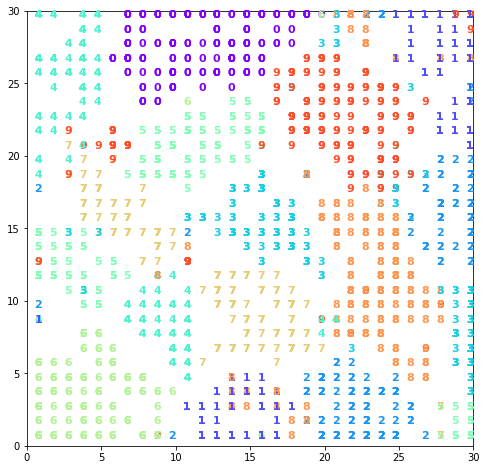

In [ ]:
plt.figure(figsize=(8, 8))
w_map = {}
image = 0
for x, digits in zip(data, target):
  winner = som.winner(x)
  w_map[image] = winner
  plt.text(winner[0] + 0.5, winner[1] + 0.5, str(digits), fontdict={'weight': 'bold', 'size': 11}, color=plt.cm.rainbow(digits/10))
  image += 1
  plt.axis([0, shape_of_weights[0], 0, shape_of_weights[1]])   # [0, 30, 0, 30]
plt.show()

Printing the data in each SOM position:

In [ ]:
mappings = som.win_map(data)
mappings

defaultdict(list,
            {(8,
              27): [array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
                     -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
                      0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
                     -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
                     -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
                      0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
                      1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
                     -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
                     -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
                      0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
                      1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
             

All index positions:

In [ ]:
all_indices = mappings.keys()
all_indices

dict_keys([(8, 27), (11, 2), (22, 29), (29, 6), (3, 26), (23, 24), (3, 4), (5, 14), (25, 11), (6, 29), (26, 29), (29, 15), (14, 14), (3, 24), (29, 1), (6, 3), (12, 10), (23, 7), (25, 22), (16, 28), (27, 27), (29, 13), (11, 15), (2, 25), (2, 10), (2, 4), (8, 13), (24, 9), (8, 25), (9, 18), (29, 2), (6, 4), (3, 10), (6, 26), (25, 21), (22, 7), (18, 21), (25, 9), (8, 12), (17, 9), (15, 15), (27, 26), (14, 26), (14, 27), (24, 11), (23, 29), (15, 29), (27, 28), (16, 13), (15, 14), (12, 9), (13, 14), (4, 3), (6, 1), (2, 0), (6, 9), (19, 8), (24, 23), (3, 9), (21, 9), (10, 29), (11, 29), (23, 3), (7, 12), (0, 8), (29, 3), (19, 25), (10, 2), (13, 9), (15, 0), (21, 7), (13, 0), (2, 26), (18, 29), (1, 5), (8, 3), (27, 29), (13, 11), (2, 11), (7, 10), (29, 12), (23, 10), (27, 12), (0, 14), (24, 22), (4, 10), (8, 10), (13, 2), (6, 8), (18, 23), (16, 29), (18, 26), (14, 2), (13, 26), (29, 29), (1, 24), (28, 0), (0, 2), (24, 10), (23, 23), (14, 29), (28, 29), (24, 4), (0, 25), (28, 2), (13, 6), (23,

In [ ]:
len(all_indices)

611

Ideally for 30 x 30 SOM, there should be 900 values for the `all_indices`, but we see that the value is less. This is because of dimensionality reduction.